### Import and Load Images

In [9]:
import numpy as np
import cv2
import  matplotlib.pyplot as plt
import os
import sys
sys.path.append('../Scripts/')
from Scripts.Utility import Utility2
ut = Utility2()

root_dir = os.path.abspath("../")
imagePath = "/Input/Images"

in init


In [21]:
images = ut.loadImages(imagePath)
ut.showImages([ut.h_concatenate_images(images)], scale=(500,500))
ut.writeImages([ut.h_concatenate_images(images)], prefix="concatInit")
#transmitted, channels = ut.loadImages(imagePath)

#ut.writeImages(ut.h_concatenate_images(images))
#ut.showImages(transmitted, scale=(500,500))
#ut.showImages(channels, scale=(500,500))

### Apply processing
1. Gabor
2. Histogram Equalization
3. Median Smooth

In [19]:
processOutput = []
finalImages = []


for image in images:
    smoothed_eq_img_arr, smt_arr, f_img, f_values = ut.processImage(image)
    processOutput.append(smoothed_eq_img_arr)
    finalImages.append(f_img)

ut.showImages(images, scale=(500,500))
#smoothed_eq_img_arr, smt_arr, f_img, f_values = ut.processImage(images[0])#ut.load_and_process_image("/Input/Images/--W00001--P00004--Z00000--T00000--BFP.tif")
#smoothed_eq_img_arr1, smt_arr1, f_img1, f_values1 = ut.processImage(images[1])#ut.load_and_process_image("/Input/Images/--W00001--P00004--Z00000--T00000--DsRed.tif")
#smoothed_eq_img_arr2, smt_arr2, f_img2, f_values2 = ut.processImage(images[2])#ut.load_and_process_image("/Input/Images/--W00001--P00004--Z00000--T00000--eGFP.tif")
#smoothed_eq_img_arr3, smt_arr3, f_img3, f_values3 = ut.processImage(images[3])#ut.load_and_process_image("/Input/Images/--W00001--P00004--Z00000--T00000--miRFP.tif")

KeyboardInterrupt: 

In [17]:
#pairs = ut.pairs_from_array(smoothed_eq_img_arr, smt_arr)
ut.showImages(processOutput[0], scale=(500,500))
#ut.writeImages(pairs, path="../ImageWrite")

### Merge Processed Images (Single Pair)
Gamma = 0.25

Theta = pi/4 && 3*pi/4

From index 1 and 5 of processed images

In [13]:
#smts = [smoothed_eq_img_arr,smoothed_eq_img_arr1, smoothed_eq_img_arr2,smoothed_eq_img_arr3]
#mergedImages = ut.mergeImages(smts, 0,3, 0.5)
mergedImages = []

for x in processOutput:
    mergedImage =  cv2.addWeighted(x[1], 0.5, x[5], .5, 0)
    mergedImages.append(mergedImage)
    


### Watershed Process

In [14]:
#mergedImages = [mergedImage, mergedImage1, mergedImage2, mergedImage3]
GrayMergedArr = ut.grayscaleImages(mergedImages)

ThresholdArr = ut.thresholdImages(GrayMergedArr)
#ut.showImages(ThresholdArr, scale=(500,500))
kmeansApplied = ut.kmeansOutImages(mergedImages, 5)

In [15]:
ut.showImages(kmeansApplied, scale=(500,500))

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\distransform.cpp:724: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::distanceTransform'


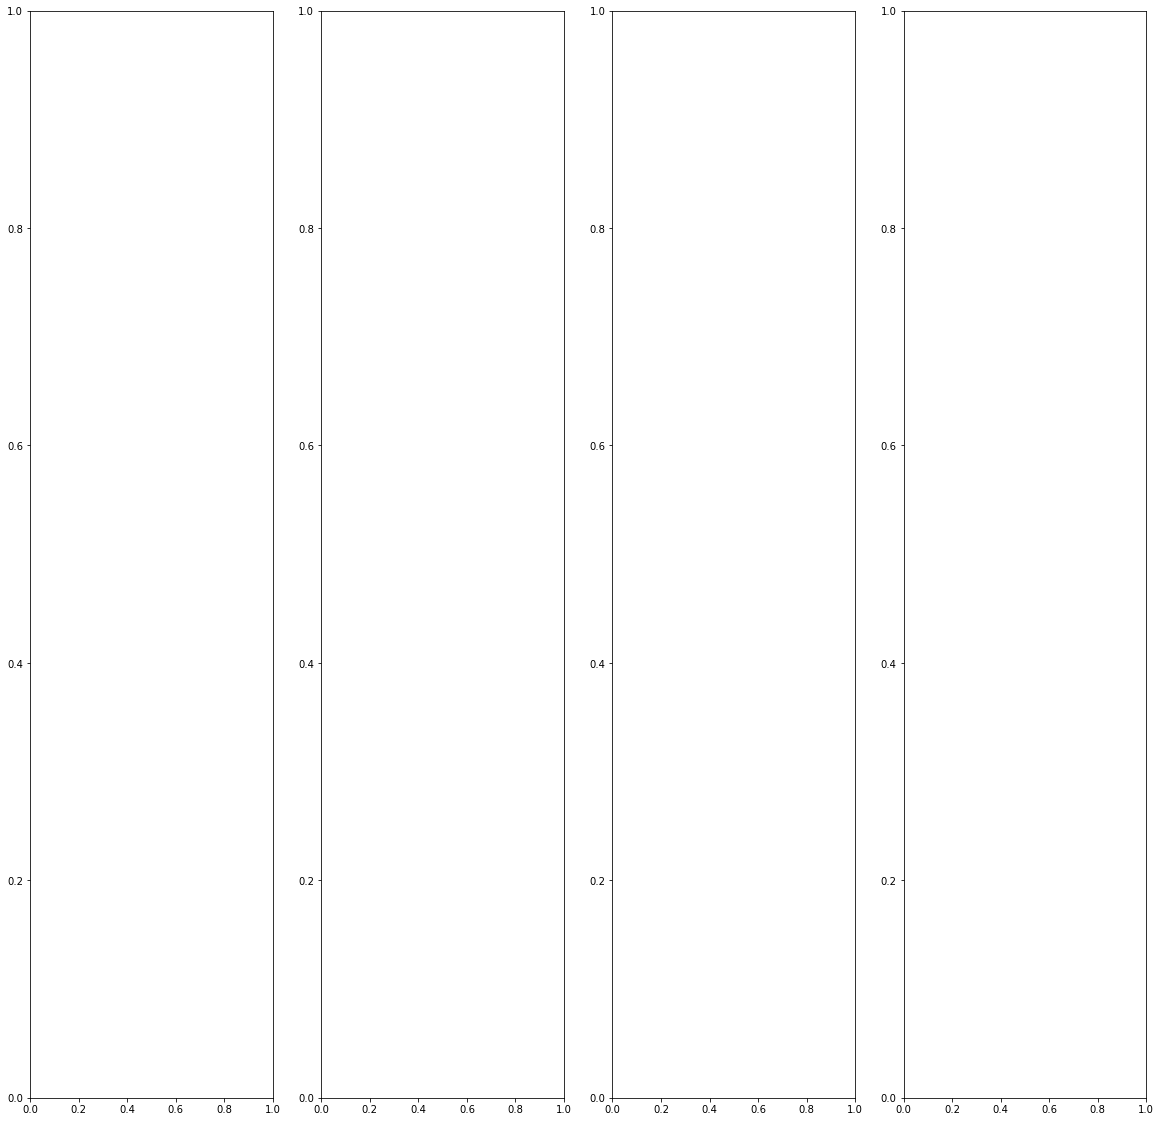

In [16]:
ThresholdedKmeans =[]#ut.thresholdImages(GrayMergedArr, minval=191, maxval=255, invert=1)
for x in range(len(kmeansApplied)):
    ret, thresh =  cv2.threshold(kmeansApplied[x], 191, 255, cv2.THRESH_BINARY)
    ThresholdedKmeans.append(thresh)


#GrayScaleKmeans = ut.grayscaleImages(kmeansApplied)
ThresholdedKmeans.pop()
ut.showImages(ThresholdedKmeans, scale=(500,500))

#watershedKMean, markers = ut.waterShedImages(ThresholdedKmeans)

fig, ax = plt.subplots(1,len(ThresholdedKmeans), figsize=(20,20))
#connected = []
#for x in range(len(ThresholdedKmeans)):
#    num, markers = cv2.connectedComponents(ThresholdedKmeans[x])
#    connected.append(markers)
#
#    ax[x].imshow(markers)
#    ax[x].set_title(str(x))
#
#fig, ax = plt.subplots(1,len(ThresholdedKmeans), figsize=(20,20))

connected = []
for x in range(len(ThresholdedKmeans)):
    num, markers = ut.waterShedImages([ThresholdedKmeans[x]])
    connected.append(markers)

    ax[x].imshow(markers)
    ax[x].set_title(str(x))


print("Something?")

In [ ]:
#plt.imshow(markers)


#ut.writeImages(watershedKMean, "watershedkmeansthresh")
#ut.showImages(watershedKMean,scale=(500,500))

singleImage = ut.pairMerge(ThresholdedKmeans)



ut.showImages([singleImage], scale=(500,500))

#histSingleImage  = ut.histogram_equalization(singleImage)

#ut.showImages([histSingleImage,singleImage], scale=(500,500))

#ut.writeImages([histSingleImage,singleImage])
ret, thresh = cv2.threshold(singleImage, 128, 255, cv2.THRESH_BINARY)

ut.showImages([singleImage,thresh], scale=(500,500))
ut.writeImages([singleImage,thresh], "ussigaci pair")
#ut.writeImages([singleImage,thresh],"postMerge", ["singleImage" , "thresh"] )

#ThresholdedKmeans.append(thresh)


print(np.shape(kmeansApplied))
#pairs = ut.pairs_from_array(ThresholdedKmeans, kmeansApplied)
#ut.showImages(pairs, scale=(500,500))

#output, markers = ut.waterShedImages(kmeansApplied)


#ut.showImages(output, scale=(500,500))


In [ ]:
ThresholdedKmeans = []
for x in range(len(kmeansApplied)):
    ret, thresh = cv2.threshold(kmeansApplied[x], 191, 255, cv2.THRESH_BINARY)
    ThresholdedKmeans.append(thresh)


#GrayScaleKmeans = ut.grayscaleImages(kmeansApplied)
ThresholdedKmeans.pop()
ut.showImages(ThresholdedKmeans, scale=(500,500))

singleImage = ut.pairMerge(ThresholdedKmeans)

ut.showImages([singleImage], scale=(500,500))

#histSingleImage  = ut.histogram_equalization(singleImage)

#ut.showImages([histSingleImage,singleImage], scale=(500,500))

#ut.writeImages([histSingleImage,singleImage])
ret, thresh = cv2.threshold(singleImage, 128, 255, cv2.THRESH_BINARY)

ut.showImages([singleImage,thresh], scale=(500,500))

#ut.writeImages([singleImage,thresh],"postMerge", ["singleImage" , "thresh"] )

#ThresholdedKmeans.append(thresh)


print(np.shape(kmeansApplied))
#pairs = ut.pairs_from_array(ThresholdedKmeans, kmeansApplied)
#ut.showImages(pairs, scale=(500,500))

#output, markers = ut.waterShedImages(kmeansApplied)


#ut.showImages(output, scale=(500,500))
